In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ruptures as rpt

In [3]:
cd ../../../Data/fusrp_2

C:\Users\Lauren\Data\fusrp_2


### Their expamples

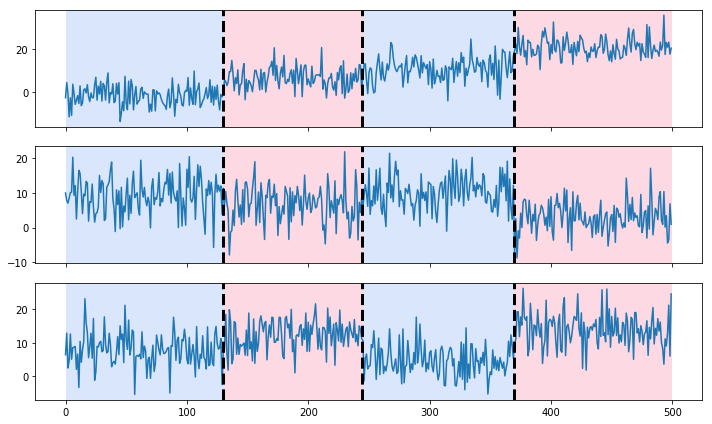

In [5]:
# creation of data
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

# change point detection
model = "normal"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(signal, bkps, my_bkps, figsize=(10, 6))
plt.show()

In [86]:
# binary
# creation of data
n = 500  # number of samples
n_bkps, sigma = 1, 5  # number of change points, noise standart deviation
exsig, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

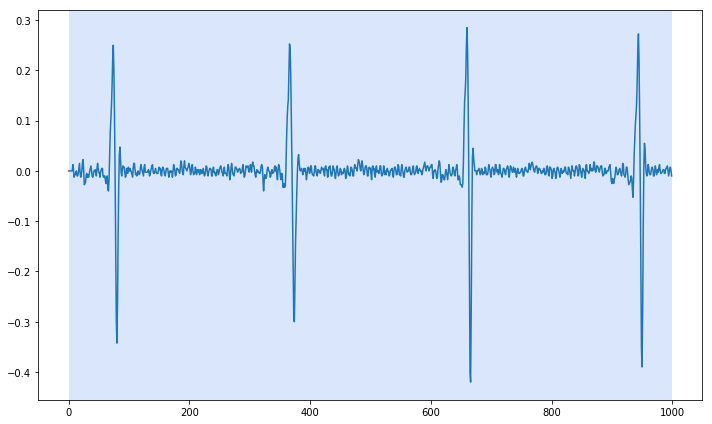

In [93]:
# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(dsig2)
my_bkps = algo.predict(pen = 500)

# show results
fig, (ax,) = rpt.display(dsig2, my_bkps, figsize=(10, 6))
plt.show()

C:\Users\Lauren\Anaconda3\lib\site-packages\ruptures\costs\costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


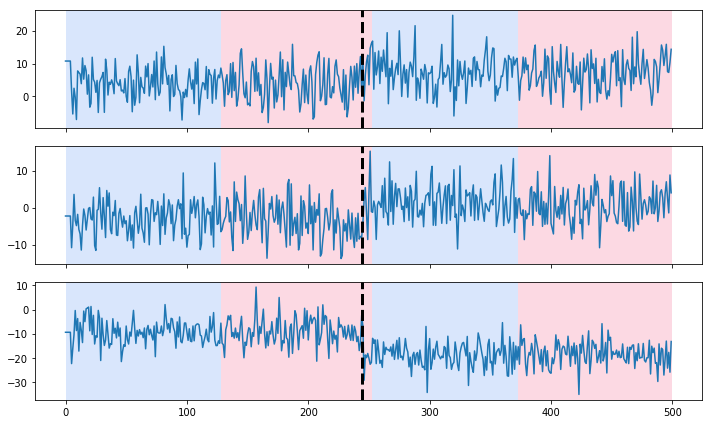

In [127]:
# change point detection
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model=model).fit(exsig)
# my_bkps = algo.predict(n_bkps=3)
# my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
my_bkps = algo.predict(epsilon=3*n*sigma**2)


# show results
rpt.show.display(exsig, bkps, my_bkps, figsize=(10, 6))
plt.show()

In [20]:
type(signal)

numpy.ndarray

### real data

In [6]:
signal = pd.read_csv("MIT_500_s.csv", header=None).values

In [42]:
sig = signal[5000:15000]

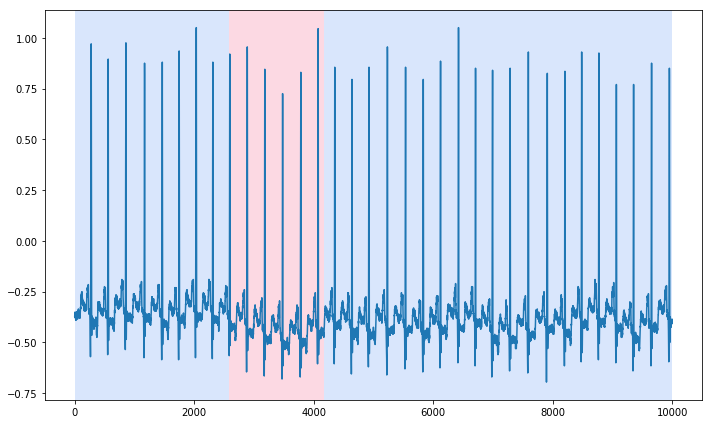

In [120]:
# change point detection
model = "rbf"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Binseg(model=model).fit(sig)
# my_bkps = algo.predict(n_bkps=3)
# my_bkps = algo.predict(pen=np.log(n)*dim*sigma**2)
my_bkps = algo.predict(pen=2)


# show results
rpt.show.display(sig, my_bkps, figsize=(10, 6))
plt.show()

### Pelt

In [49]:
sig2 = signal[0:1000]

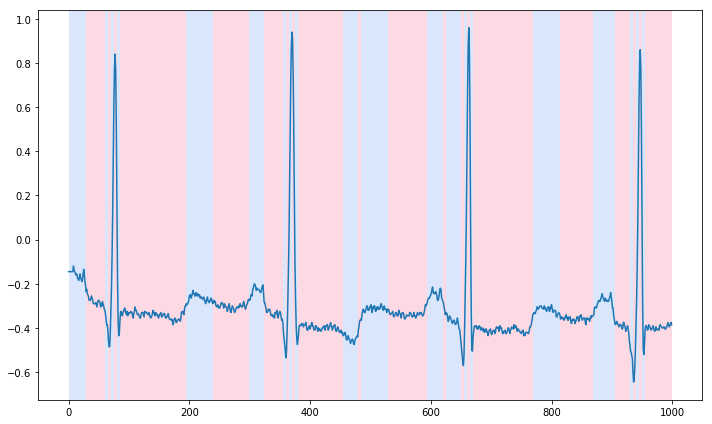

In [104]:
# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(sig2)
my_bkps = algo.predict(pen=.01)

# show results
fig, (ax,) = rpt.display(sig2, my_bkps, figsize=(10, 6))
plt.show()

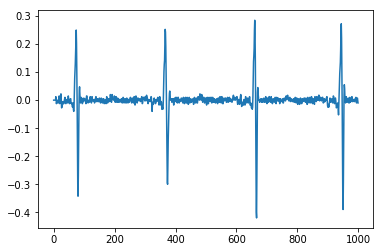

In [78]:
plt.plot(np.gradient(np.ravel(sig2),1))

In [79]:
dsig2 = np.gradient(np.ravel(sig2),1)

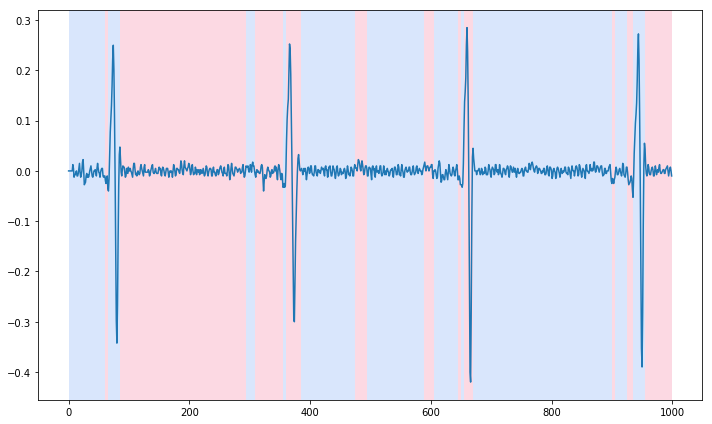

In [112]:
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(dsig2)
my_bkps = algo.predict(pen=1.5)

# show results
fig, (ax,) = rpt.display(dsig2, my_bkps, figsize=(10, 6))
plt.show()

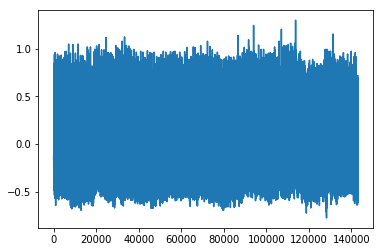

In [84]:
plt.plot(signal)

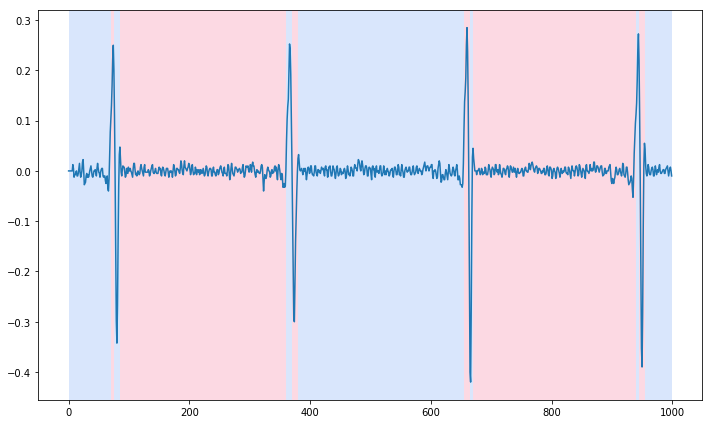

In [119]:
# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(dsig2)
my_bkps = algo.predict(pen=0.07)

# show results
fig, (ax,) = rpt.display(dsig2, my_bkps, figsize=(10, 6))
plt.show()

C:\Users\Lauren\Anaconda3\lib\site-packages\ruptures\costs\costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


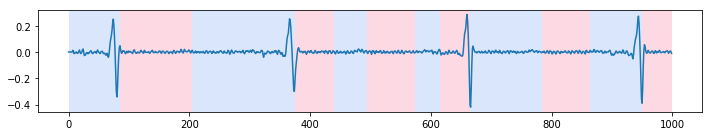

In [141]:
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(dsig2)
my_bkps = algo.predict(n_bkps=125)

# show results
rpt.show.display(dsig2, my_bkps)
plt.show()

## Tried on other data

In [7]:
cd entropy

C:\Users\Lauren\Data\fusrp_2\entropy


In [8]:
file_name = "ECG200_TEST.csv"
test_df = pd.read_csv(file_name, header=None)
data = np.ravel(test_df.drop(0, axis=1))

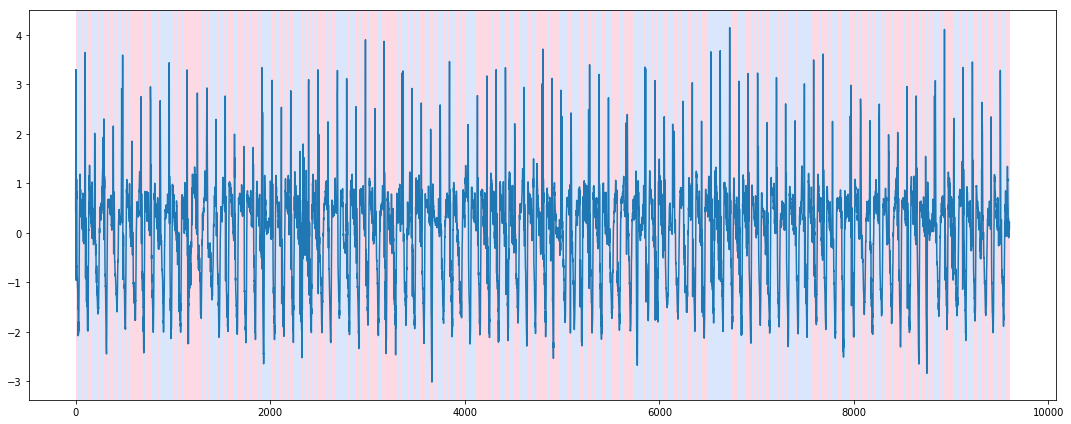

In [150]:
# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(data)
my_bkps = algo.predict(pen=0.07)

# show results
fig, (ax,) = rpt.display(data, my_bkps, figsize=(15, 6))
plt.show()

In [11]:
test_data = np.ravel(test_df[0:10].drop(0, axis=1))

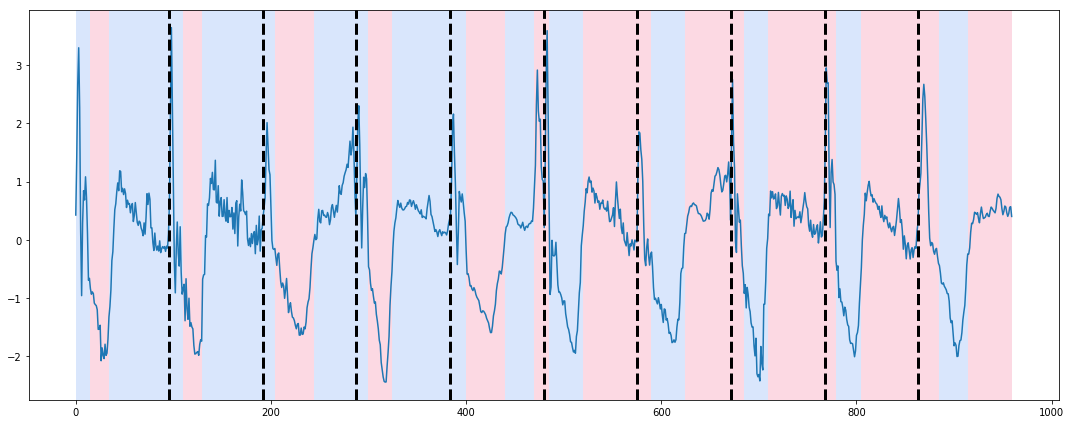

In [33]:
# change point detection
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(test_data)
my_bkps = algo.predict(pen=20)
bkps = np.arange(96,960,96)

# show results
fig, (ax,) = rpt.display(test_data, my_bkps, bkps, figsize=(15, 6))
plt.show()

In [41]:
pca_pt5 = pd.read_csv("pt5NSR_csv_pcadiff.csv", header=None)

In [42]:
pca_pt5_test = np.ravel(pca_pt5.drop(0, axis=1))

In [47]:
pca_pt5.drop(0, axis=1).shape

(100, 264)

In [49]:
pca_pt5.head()

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
0,0.0,-0.970202,0.835145,-1.022761,0.307183,1.440033,-0.154035,-0.470571,0.356426,-0.459002,...,1.763181,0.747112,-1.098101,-0.560589,-1.104664,-1.823389,0.070043,-2.346332,-0.222482,-1.265045
1,1.0,-0.002061,0.413367,0.240763,-0.236908,0.100718,-0.043903,0.011489,0.081451,0.108150,...,-0.076878,0.030864,0.122230,-0.242331,0.149447,-0.049585,-0.006900,-0.118132,-0.032220,0.130466
2,1.0,-0.258099,0.067471,-0.263055,-0.253231,0.170756,-0.084039,-0.061112,-0.330172,0.255666,...,0.015158,0.135139,0.191691,-0.347048,0.157111,-0.097153,-0.044873,0.009905,0.059600,0.080396
3,1.0,0.022271,-0.365285,-0.054924,0.286489,-0.019011,-0.193639,0.068138,-0.285976,0.052420,...,0.099703,-0.024934,-0.038011,0.110967,-0.368474,0.270473,-0.083831,0.134419,-0.029349,-0.197417
4,0.0,2.311158,-1.163292,-1.176096,-0.282674,-0.257053,0.936468,-1.397373,1.480007,-0.347384,...,-3.941825,0.818278,-2.194779,0.304505,-0.000962,0.270323,-0.233342,0.869718,-0.352860,0.546748


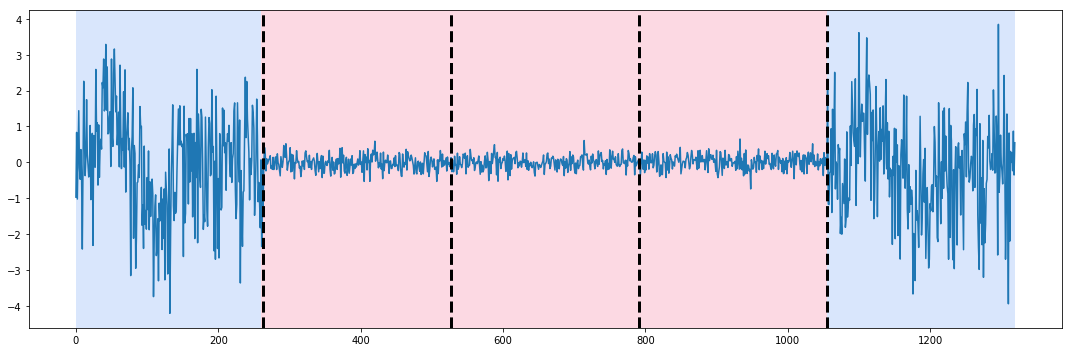

In [63]:
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(pca_pt5_test[0:5*264])
my_bkps = algo.predict(pen=5)
heartbeat, hb_pts = pca_pt5[0:5*264].drop(0, axis=1).shape
bkps = np.arange(hb_pts, heartbeat*hb_pts, hb_pts)

# show results
fig, (ax,) = rpt.display(pca_pt5_test[0:5*264], my_bkps, bkps, figsize=(15, 5))
plt.show()

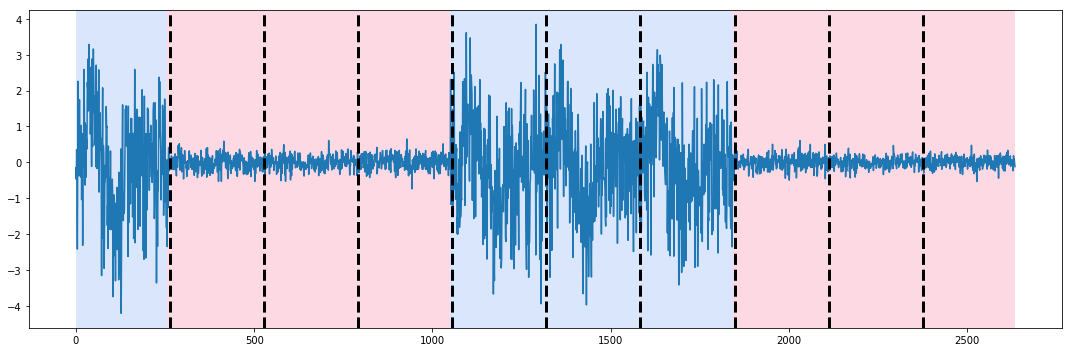

In [65]:
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(pca_pt5_test[5:10*264])
my_bkps = algo.predict(pen=5)
heartbeat, hb_pts = pca_pt5[5:10*264].drop(0, axis=1).shape
bkps = np.arange(hb_pts, heartbeat*hb_pts, hb_pts)

# show results
fig, (ax,) = rpt.display(pca_pt5_test[5:10*264], my_bkps, bkps, figsize=(15, 5))
plt.show()

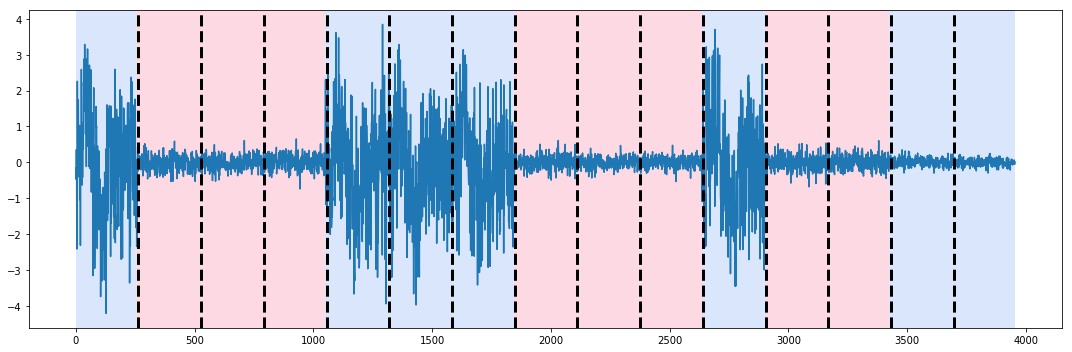

In [71]:
data = pca_pt5_test[5:15*264]
hb_pts = 264
heartbeat = 15
# change point detection
model = "rbf"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(data)
my_bkps = algo.predict(pen=5)
bkps = np.arange(hb_pts, heartbeat*hb_pts, hb_pts)

# show results
fig, (ax,) = rpt.display(data, my_bkps, bkps, figsize=(15, 5))
plt.show()